## Loading Data

In [1]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVR
import numpy as np

/Users/nishantrathi/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dfFinal = pd.read_csv('News_Final.csv')
dfFb_Ec = pd.read_csv('Facebook_Economy.csv')
dfFb_Ms = pd.read_csv('Facebook_Microsoft.csv')
dfFb_Ob = pd.read_csv('Facebook_Obama.csv')
dfFb_Pa = pd.read_csv('Facebook_Palestine.csv')
dfGo_Pa = pd.read_csv('GooglePlus_Palestine.csv')
dfGo_Ob = pd.read_csv('GooglePlus_Obama.csv')
dfGo_Ms = pd.read_csv('GooglePlus_Microsoft.csv')
dfGo_Ec = pd.read_csv('GooglePlus_Economy.csv')
dfLd_Pa = pd.read_csv('LinkedIn_Palestine.csv')
dfLd_Ob = pd.read_csv('LinkedIn_Obama.csv')
dfLd_Ms = pd.read_csv('LinkedIn_Microsoft.csv')
dfLd_Ec = pd.read_csv('LinkedIn_Economy.csv')

In [3]:
#Peek into data

dfFinal


,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
5,27790.0,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0
7,80762.0,"Obama, stars pay a musical tribute to Ray Charles",First lady Michelle Obama speaks in the State ...,Coast Reporter,obama,2015-03-01 00:45:00,0.083333,0.103003,-1,-1,-1
8,80771.0,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1
9,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1


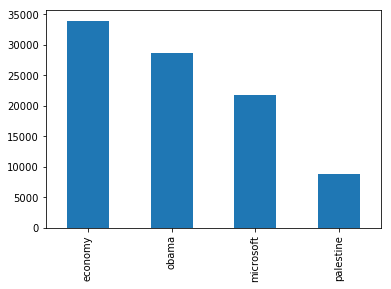

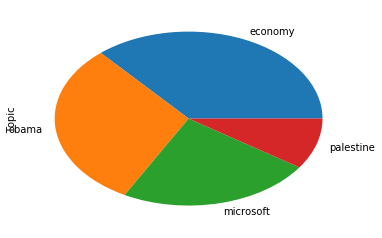

In [4]:
import matplotlib.pyplot as plt
dfFinal.Topic.value_counts().plot(kind='bar')
plt.show()
dfFinal.Topic.value_counts().plot(kind='pie')
plt.show()

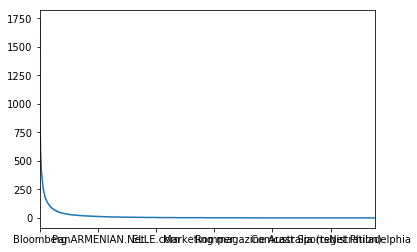

Bloomberg                                                   1732
Reuters                                                     1321
ABC News                                                    1098
New York Times                                               992
The Guardian                                                 933
Business Insider                                             884
Economic Times                                               787
Forbes                                                       781
Washington Post                                              774
CNN                                                          742
Wall Street Journal                                          730
WinBeta                                                      707
CNBC                                                         682
Huffington Post                                              676
Breitbart News                                               605
Reuters via Yahoo! Financ

In [5]:
dfFinal.Source.value_counts().plot(kind="line")
plt.show()
dfFinal.Source.value_counts()

In [6]:
#removing the items which was never shared or with share counts = 0
df = dfFinal[(dfFinal.Facebook != -1) & (dfFinal.GooglePlus != -1) & (dfFinal.LinkedIn != -1) & (dfFinal.Facebook != 0) & (dfFinal.GooglePlus != 0) & (dfFinal.LinkedIn != 0)]


In [7]:
#removing time from publish date
df['PublishDate'] = df['PublishDate'].astype('datetime64[ns]')
df['DateOnly'] = df['PublishDate'].dt.date

/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
#count number of days since Jan 1 1970. These columns would be used to form groups of 3 days
df['DaysSince1'] = (pd.to_datetime(df['DateOnly']) - pd.datetime(1970,1,1)).dt.days
df['DaysSince1'] = df['DaysSince1'].subtract(df['DaysSince1'].min()).add(1)
df['DaysSince2'] = df['DaysSince1'] + 1
df['DaysSince3'] = df['DaysSince1'] + 2

/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [9]:
# Calculate rank of the news item within the 3 day window group

loop_start = df['DaysSince1'].min()
loop_end = df['DaysSince1'].max()
print loop_start
print loop_end
rankDictionary = {}
for x in range(loop_start, loop_end):
    df_temp = df[(df.DaysSince1 == x) | (df.DaysSince2 == x) | (df.DaysSince3 == x)]
    df_temp.sort_values(by='Facebook')# Made it ascending so that we rank them in reverse order #, ascending=False)
    df_temp['GroupRanking'] = df_temp['Facebook'].rank(ascending=False)
    for index, row in df_temp.iterrows():
        if row['DaysSince1'] == x:
            rankDictionary[row['IDLink']] = row['GroupRanking']
    


1
243


/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
#Edit original Data frame to assign group rank

def assignRank(row):
    if row.IDLink in rankDictionary:
        return rankDictionary[row.IDLink]
    else:
        return 1

df['groupRank'] = df.apply (lambda row: assignRank (row),axis=1)

/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
df

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,DateOnly,DaysSince1,DaysSince2,DaysSince3,groupRank
736,292.0,"Get ready for a ton of Fedspeak (DJIA, SPY, SP...",The US economy had a blockbuster October. US c...,Business Insider,economy,2015-11-08 13:07:00,-0.055902,-0.378927,27,2,22,2015-11-08,1,2,3,1.0
738,328.0,Microsoft to play a big part in Digital India,"Bhaskar Pramanik, Chairman, Microsoft India, s...",DNA India,microsoft,2015-11-08 16:47:00,-0.018326,0.062500,11,1,1,2015-11-08,1,2,3,2.0
742,476.0,Microsoft readies its next major Windows 10 Fa...,Microsoft is on the verge of issuing its first...,SiliconANGLE,microsoft,2015-11-08 21:50:00,0.004360,0.210430,4,2,4,2015-11-08,1,2,3,3.0
746,15.0,Investing in our families is a vital part of t...,When governments measure national economies in...,Financial Times,economy,2015-11-09 00:00:00,0.037689,-0.042318,127,2,55,2015-11-09,2,3,4,13.0
747,16.0,CBI downgrades UK growth forecasts over global...,The CBI has downgraded its forecasts for UK gr...,Financial Times,economy,2015-11-09 00:00:00,-0.166667,-0.200000,8,3,6,2015-11-09,2,3,4,49.0
748,25.0,Vietnam Growth Masks Weak Local Firms in 2-Spe...,Vietnam's export-driven economy is set to grow...,Bloomberg,economy,2015-11-09 00:00:00,-0.236111,-0.029830,31,7,3,2015-11-09,2,3,4,26.0
751,38.0,UK pay rises to stay low despite economic reco...,The likelihood of employers offering low wage ...,The Guardian,economy,2015-11-09 00:00:00,-0.208333,-0.102290,20,8,74,2015-11-09,2,3,4,33.0
753,42.0,Philippines economy thrives as young workers s...,The Philippines economy has traditionally been...,Financial Times,economy,2015-11-09 00:00:00,-0.197642,-0.059101,88,6,58,2015-11-09,2,3,4,17.0
754,64.0,"China is on the brink of a major milestone, an...","This brings us to China, the world's second-la...",Business Insider,economy,2015-11-09 00:00:00,0.108253,0.118766,177,7,105,2015-11-09,2,3,4,5.0
755,74.0,Shareholder short-termism is damaging,"Here, then, is a compelling case that the econ...",Financial Times,economy,2015-11-09 00:00:00,0.000000,-0.097222,10,1,31,2015-11-09,2,3,4,44.5


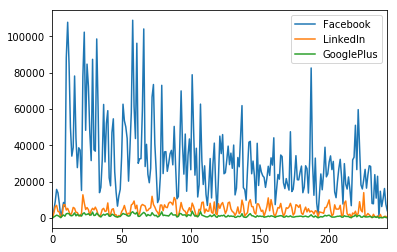

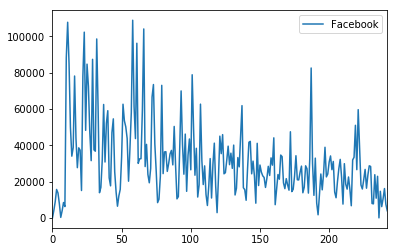

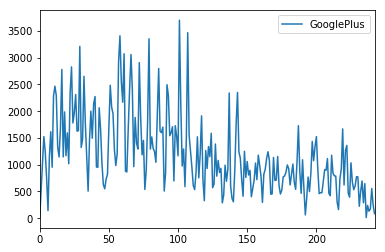

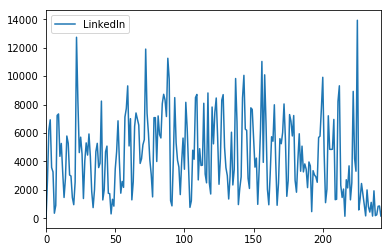

In [12]:
df[['DateOnly','Facebook','LinkedIn','GooglePlus']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()
df[['DateOnly','Facebook']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()
df[['DateOnly','GooglePlus']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()
df[['DateOnly','LinkedIn']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()

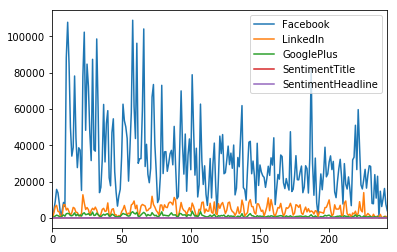

In [13]:
df[['DateOnly','Facebook','LinkedIn','GooglePlus','SentimentTitle','SentimentHeadline']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()

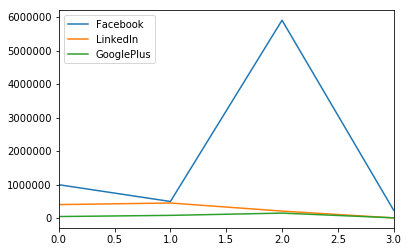

In [14]:
df[['Topic','Facebook','LinkedIn','GooglePlus']].groupby(['Topic'],as_index = False).sum().plot.line()
plt.show()


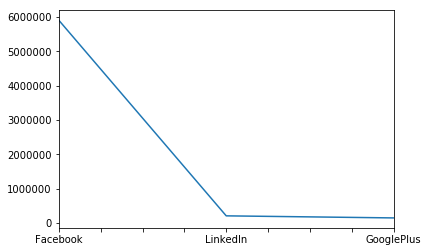

Facebook      5902582
LinkedIn       209832
GooglePlus     149640
dtype: int64


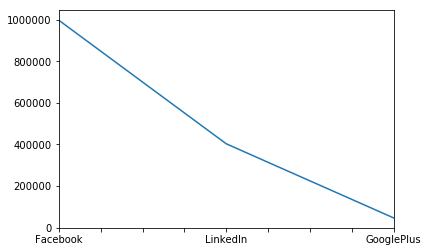

Facebook      996629
LinkedIn      403391
GooglePlus     47408
dtype: int64


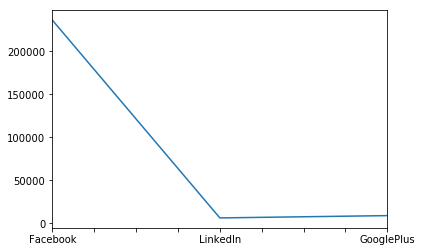

Facebook      236352
LinkedIn        6352
GooglePlus      9031
dtype: int64


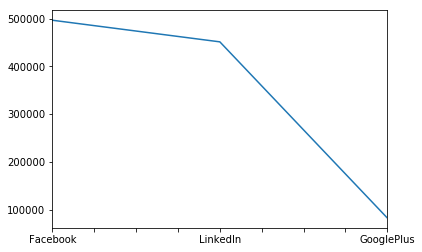

Facebook      496408
LinkedIn      451162
GooglePlus     82500
dtype: int64


In [15]:
df_Obama = df[(df.Topic == 'obama')]
df_Obama[['Facebook','LinkedIn','GooglePlus']].sum().plot.line()
plt.show()
print df_Obama[['Facebook','LinkedIn','GooglePlus']].sum() 

df_Economy = df[(df.Topic == 'economy')]
df_Economy[['Facebook','LinkedIn','GooglePlus']].sum().plot.line()
plt.show()
print df_Economy[['Facebook','LinkedIn','GooglePlus']].sum() 

df_Palestine = df[(df.Topic == 'palestine')]
df_Palestine[['Facebook','LinkedIn','GooglePlus']].sum().plot.line()
plt.show()
print df_Palestine[['Facebook','LinkedIn','GooglePlus']].sum() 

df_Microsoft = df[(df.Topic == 'microsoft')]
df_Microsoft[['Facebook','LinkedIn','GooglePlus']].sum().plot.line()
plt.show()
print df_Microsoft[['Facebook','LinkedIn','GooglePlus']].sum() 


#plt.show()
#df.loc[df['column_name'] == some_value]

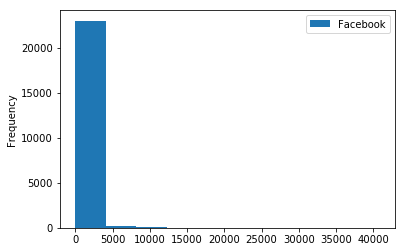

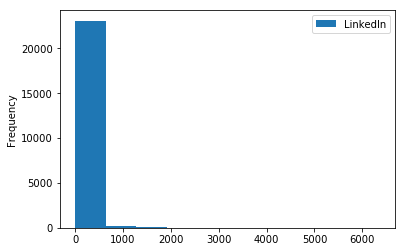

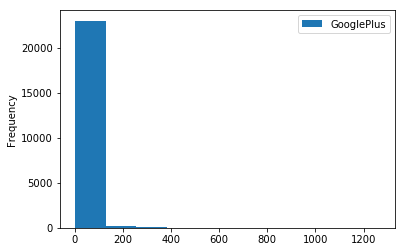

In [16]:
df[['Facebook']].plot.hist()
plt.show()
df[['LinkedIn']].plot.hist()
plt.show()
df[['GooglePlus']].plot.hist()
plt.show()

In [17]:
df['Facebook'] = df['Facebook'].apply(lambda x: np.log(x + 1))
df['LinkedIn'] = df['LinkedIn'].apply(lambda x: np.log(x + 1))
df['GooglePlus'] = df['GooglePlus'].apply(lambda x: np.log(x + 1))

/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

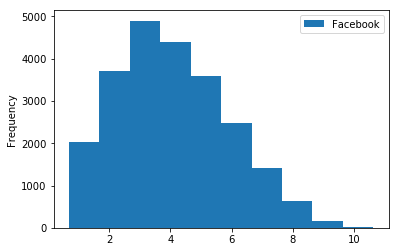

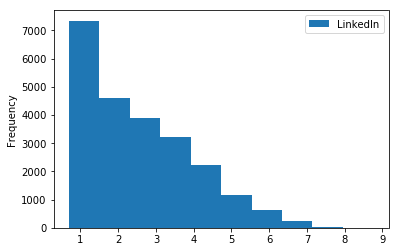

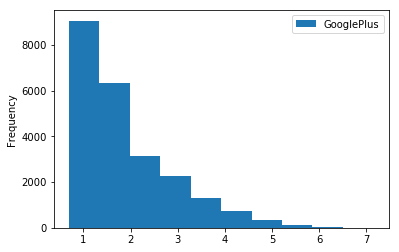

In [18]:
df[['Facebook']].plot.hist()
plt.show()
df[['LinkedIn']].plot.hist()
plt.show()
df[['GooglePlus']].plot.hist()
plt.show()

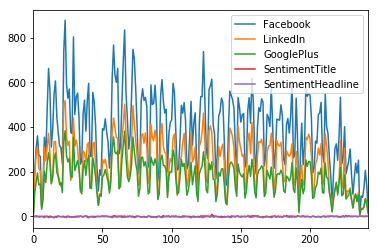

In [19]:
df[['DateOnly','Facebook','LinkedIn','GooglePlus','SentimentTitle','SentimentHeadline']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()

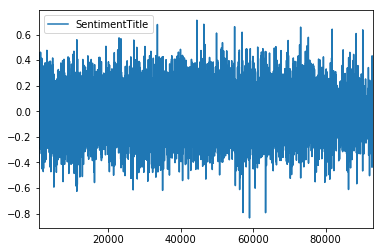

In [20]:
df[['SentimentTitle']].plot.line()
plt.show()

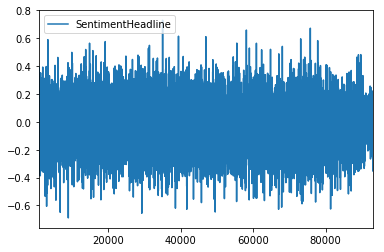

In [21]:
df[['SentimentHeadline']].plot.line()
plt.show()

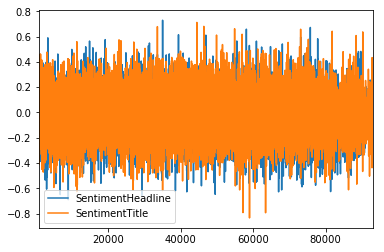

In [22]:
df[['SentimentHeadline','SentimentTitle']].plot.line()
plt.show()

In [23]:
df['SentimentTitle'] = df['SentimentTitle'].apply(lambda x: np.exp(1+x))
df['SentimentHeadline'] = df['SentimentHeadline'].apply(lambda x: np.exp(1+x))

/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/nishantrathi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


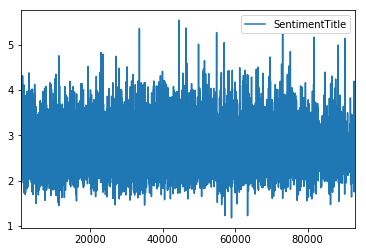

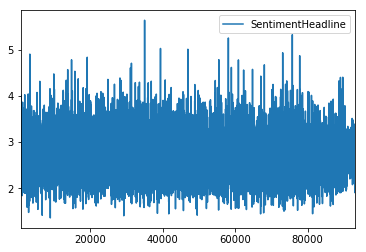

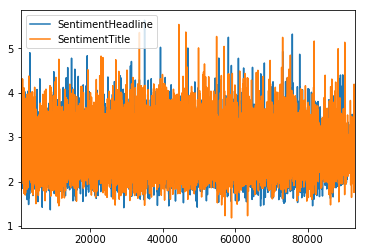

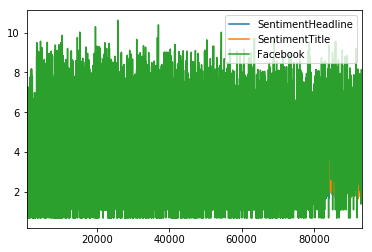

In [24]:
df[['SentimentTitle']].plot.line()
plt.show()

df[['SentimentHeadline']].plot.line()
plt.show()

df[['SentimentHeadline','SentimentTitle']].plot.line()
plt.show()

df[['SentimentHeadline','SentimentTitle', 'Facebook']].plot.line()
plt.show()

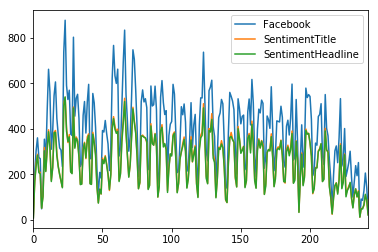

In [25]:
df[['DateOnly','Facebook','SentimentTitle','SentimentHeadline']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()

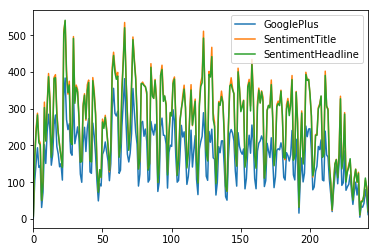

In [27]:
df[['DateOnly','GooglePlus','SentimentTitle','SentimentHeadline']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()

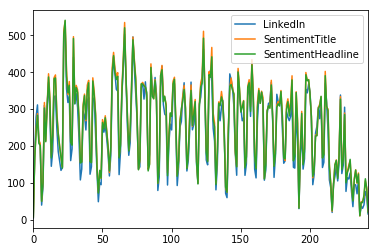

In [28]:
df[['DateOnly','LinkedIn','SentimentTitle','SentimentHeadline']].groupby(['DateOnly'],as_index = False).sum().plot.line()
plt.show()

In [ ]:
#Split DataFrame into X and Y

#df_X_Without_Rank = pd.get_dummies(df[['Source', 'Topic', 'SentimentTitle', 'SentimentHeadline']])
df_X = pd.get_dummies(df[['Source', 'Topic', 'SentimentTitle', 'SentimentHeadline', 'groupRank']])
df_Y = df[['Facebook']]


In [ ]:
df_X

In [ ]:
#Split data into test and train data sets

xtrain, xtest, ytrain, ytest = train_test_split(df_X, df_Y, test_size=0.25)

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

In [ ]:
clf = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
clf.fit(xtrain, ytrain) 

In [ ]:
preds = clf.predict(xtest)

In [ ]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

r2 = r2_score(ytest, preds, multioutput='uniform_average')
mae = median_absolute_error(ytest, preds)
msle =mean_squared_log_error(ytest, preds) 
mse = mean_squared_error(ytest, preds)
mabe = mean_absolute_error(ytest, preds)
evs = explained_variance_score(ytest, preds) 

In [ ]:
print r2
print mae
print msle
print mse
print mabe
print evs

In [ ]:
#Without Ranking

clf2 = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
xtrain2 = xtrain.drop(['groupRank'], axis=1, inplace=False)
xtest2 = xtest.drop(['groupRank'], axis=1, inplace=False)

In [ ]:
xtrain2.shape

In [ ]:
clf2.fit(xtrain2, ytrain)

In [ ]:
preds2 = clf2.predict(xtest2)

In [ ]:

r2_B = r2_score(ytest, preds2, multioutput='uniform_average')
mae_B = median_absolute_error(ytest, preds2)
msle_B =mean_squared_log_error(ytest, preds2) 
mse_B = mean_squared_error(ytest, preds2)
mabe_B = mean_absolute_error(ytest, preds2)
evs_B = explained_variance_score(ytest, preds2) 

In [ ]:
#Output Without Group Ranking

print r2_B
print mae_B
print msle_B
print mse_B
print mabe_B
print evs_B

In [ ]:
ytest['OP_WithRank']=preds
ytest['OP_With_OUT_Rank']=preds2

In [ ]:
ytest[0:10]

In [ ]:
ytest.to_csv('output.csv')